This notebook is used to interactively choose the best parameters for identifying the gait landmarks in each trial.

In [1]:
from IPython.html.widgets import interactive
from IPython.display import display
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from gaitanalysis.gait import plot_gait_cycles

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import sys
sys.path.append('../src')

In [3]:
import utils

In [4]:
%matplotlib inline

In [5]:
trial_number = '016'
event = 'Longitudinal Perturbation'

In [6]:
trial = utils.Trial(trial_number)
# trial.remove_precomputed_data()
trial._write_event_data_frame_to_disk(event)
trial._write_inverse_dynamics_to_disk(event)

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/016-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 1.32 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/016-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 1.11 s to execute.


In [7]:
gait_data = trial.gait_data_objs[event]

In [8]:
window = 1000
last_index = len(gait_data.data) - window

In [9]:
from gait_landmark_settings import settings
p = settings[trial_number]
p

(11.0, 25.0, 110, 150)

In [10]:
def plot_landmarks(filter_frequency=p[0], threshold=p[1], index=0):
    gait_data.grf_landmarks('FP2.ForY', 'FP1.ForY',
                               filter_frequency=filter_frequency, threshold=threshold)
    axes = gait_data.plot_landmarks(['FP2.ForY'], 'right', index=index, window=window)

In [11]:
figsize(14, 6)

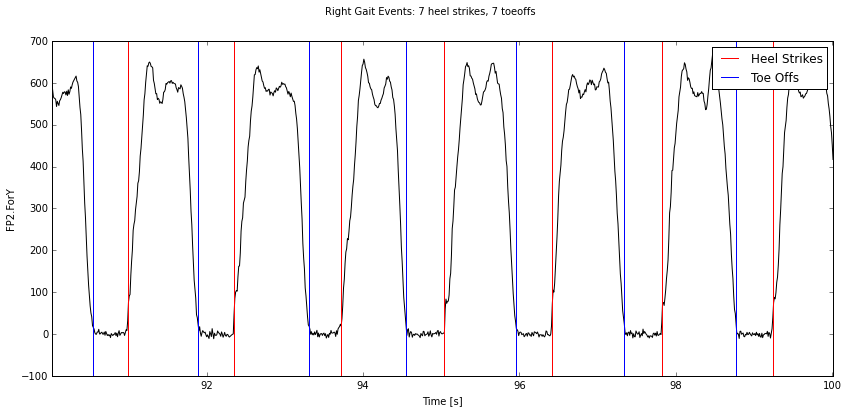

In [12]:
w = interactive(plot_landmarks, filter_frequency=(0.0, 50.0, 1.0),
                threshold=(0.0, 70.0, 1.0), index=(0, last_index, window))
w.msg_throttle = 0
display(w)

In [13]:
w.kwargs

{'filter_frequency': 11.0, 'index': 0, 'threshold': 25.0}

In [14]:
_ = gait_data.grf_landmarks('FP2.ForY', 'FP1.ForY',
                        filter_frequency=w.kwargs['filter_frequency'],
                        threshold=w.kwargs['threshold'])

In [15]:
_ = gait_data.split_at('right', num_samples=20, belt_speed_column='RightBeltSpeed')

In [16]:
cols = ['FP2.ForY',
        'FP2.MomZ',
        'Right.Ankle.PlantarFlexion.Angle',
        'Right.Ankle.PlantarFlexion.Rate',
        'Right.Ankle.PlantarFlexion.Moment']

In [17]:
figsize(14, len(cols) * 3)

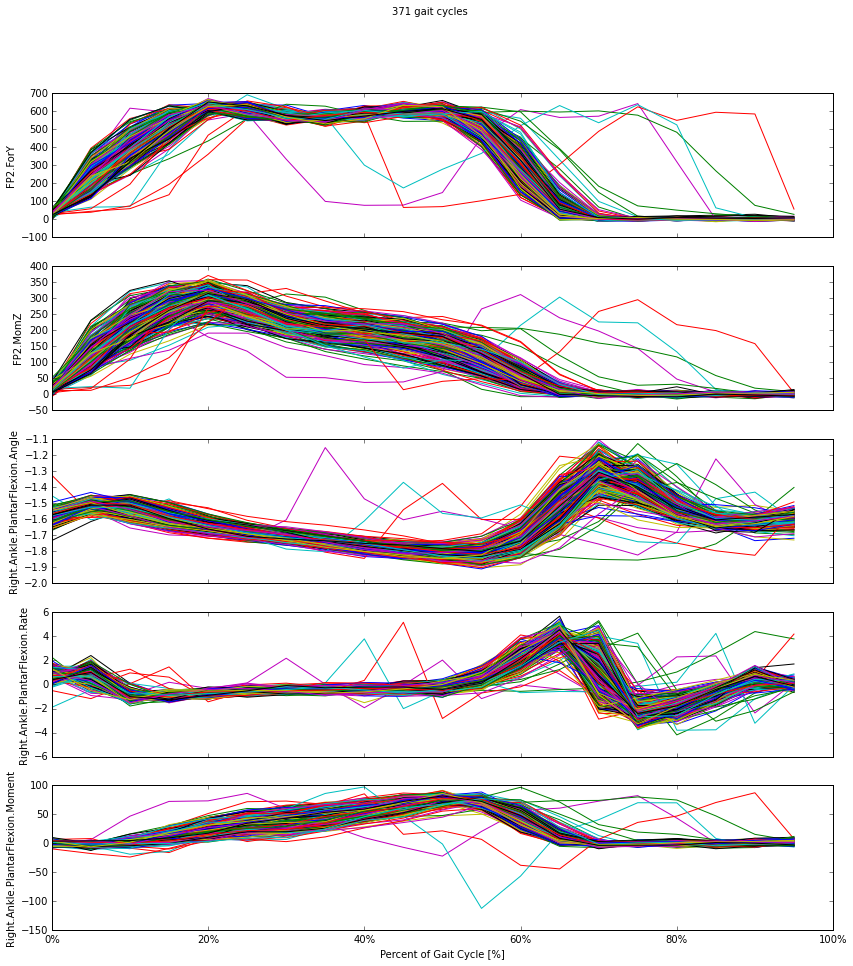

In [18]:
axes = gait_data.plot_gait_cycles(*cols)

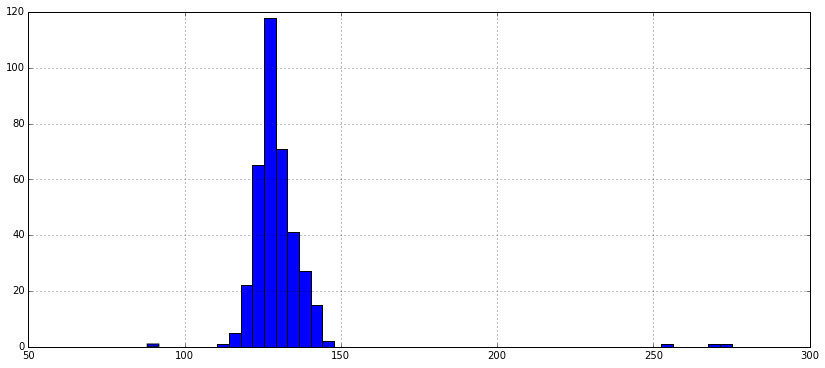

In [19]:
figsize(14, 6)
axes = gait_data.gait_cycle_stats['Number of Samples'].hist(bins=50)

In [20]:
culled_gait_cycles, culled_gait_cycle_stats = trial._remove_bad_gait_cycles(event)

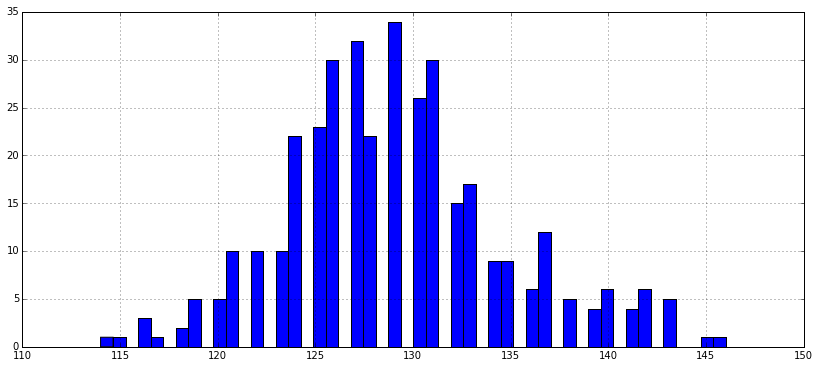

In [21]:
figsize(14, 6)
axes = culled_gait_cycle_stats['Number of Samples'].hist(bins=50)

In [22]:
figsize(14, len(cols) * 3)

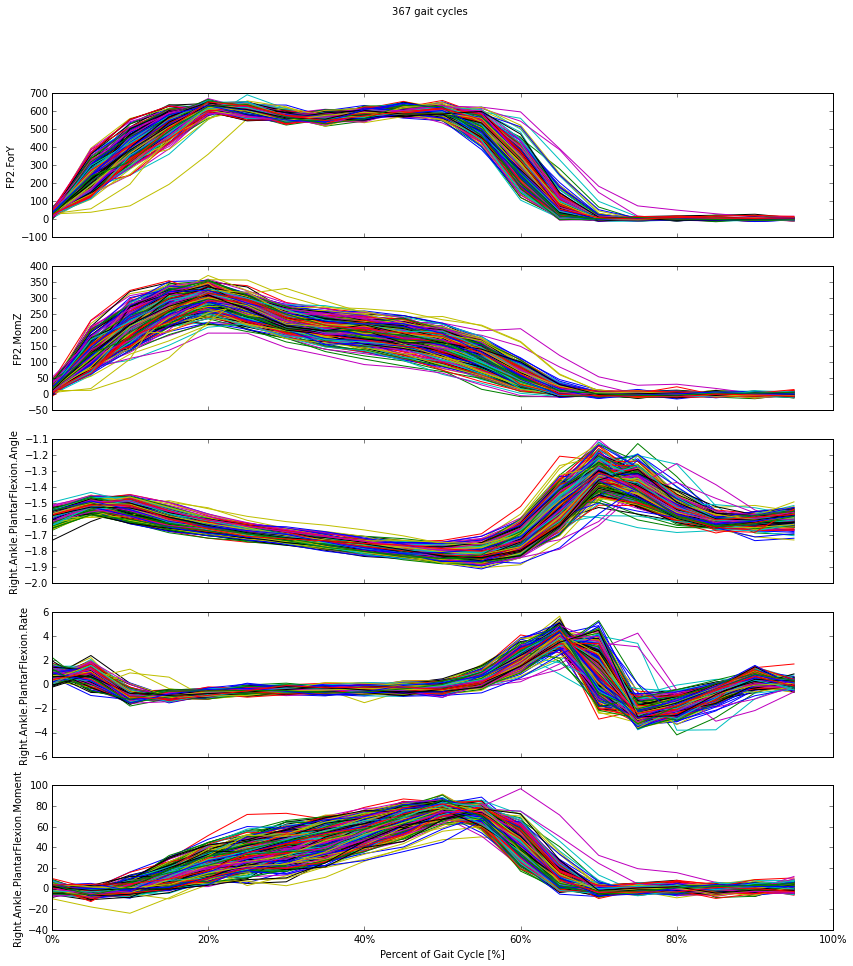

In [23]:
axes = plot_gait_cycles(culled_gait_cycles, *cols)

# Footer

In [24]:
!git rev-parse HEAD

4b7520a71e9c9078585efc0871bb1d133bb54316


In [25]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [26]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [27]:
%load_ext version_information

In [28]:
%version_information numpy, scipy, pandas, matplotlib, tables, oct2py, dtk, gaitanalysis

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1
oct2py,3.1.0
dtk,0.4.0
